In [151]:
#Importing libraries
import pandas as pd
import numpy as np

#Loading the DataFrame
teams = pd.read_csv('teams.csv', index_col = 0)
pd.set_option('display.max_columns', 50)
teams.head()

,Season,Region,Games,Win rate,K:D,GPM,GDM,Game duration,Kills / game,Deaths / game,Towers killed,Towers lost,FB%,FT%,DRAPG,DRA%,HERPG,HER%,DRA@15,TD@15,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100 Thieves,S8,NaN,69,53.6%,1.04,1761,-12,36:48,11.0,10.6,6.5,6.1,62.3,55.1,1.80,47.2,0.36,38.5,0.57,-0.1,-280,0.88,52.8,33.6,1800,3.4,1.22,1.58
100 Thieves,S9,NaN,18,22.2%,0.69,1693,-153,35:53,7.6,11.1,4.4,8.1,33.3,44.4,2.00,38.8,0.39,38.9,0.67,0.1,-558,0.61,31.0,32.9,1540,3.3,1.22,1.44
100 Thieves Academy,S9,NaN,23,52.2%,0.90,1796,-16,35:38,13.6,15.0,6.2,6.3,26.1,43.5,2.87,56.5,0.61,63.6,1.09,-0.2,-789,1.13,55.2,31.9,2127,3.1,1.20,1.33
100 Thieves Academy,S8,NaN,41,46.3%,0.91,1752,-35,33:13,10.2,11.2,5.8,6.3,51.2,41.5,1.61,46.1,0.32,34.2,0.46,0.1,-553,0.59,43.1,34.1,1761,3.6,1.15,1.33
1907 Fenerbahce,S7,TR,22,63.6%,1.19,1882,121,35:52,13.3,11.1,7.5,5.5,31.8,31.8,1.73,51.5,0.23,23.8,0.45,0.1,309,1.00,65.2,31.6,2046,3.3,0.87,1.31


In [152]:
#Filtering only the teams I will use
filtro = teams['Season'] == 'S9'
teams = teams[filtro]
filtro_teams = teams.index.isin(['Team Liquid', 'SK Telecom T1','INTZ eSports', 'Flash Wolves','G2 Esports', 'Invictus Gaming'])
teams = teams[filtro_teams]

#Adapting some columns to fit the graphics
teams['Deaths / game'] = teams['Deaths / game']*-1
teams['Towers lost'] = teams['Towers lost']*-1

teams['Win rate'] = teams['Games'] * round(teams['Win rate'].str.rstrip('%').astype('float') / 100.0, 2)
teams['Win rate'] = np.rint(teams['Win rate'])
teams['Win rate'] = teams['Win rate'].astype(int)
teams = teams.rename(columns = {'Win rate': 'WGames'})

In [153]:
#Importing data visualization library
%matplotlib inline
import matplotlib.pyplot as plt

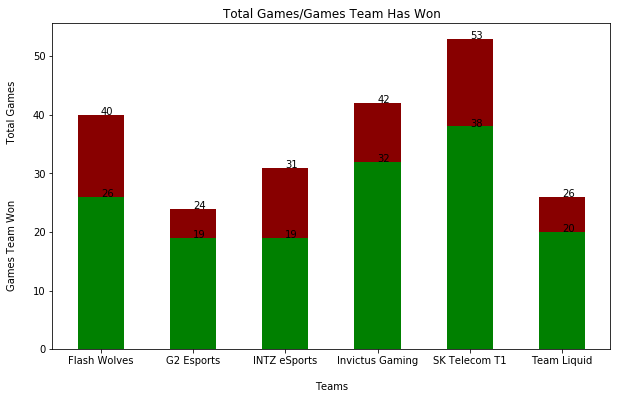

In [154]:
plt.figure(figsize = (10,6))
team_names = teams.index
games = teams['Games']
w_games = teams['WGames']
calc_p = (w_games*100)/games, '%'
plt.bar(team_names, games, width = 0.5, color = '#880000')
for i,j in zip(team_names, games):
    plt.annotate((j), (i,j))
plt.bar(team_names, w_games, width = 0.5, color = 'g')
for i,j in zip(team_names, w_games):
    plt.annotate((j), (i,j))
plt.title('Total Games/Games Team Has Won')
plt.ylabel('Games Team Won                  Total Games\n')
plt.xlabel('\nTeams')
plt.savefig('Total games and games won.png', dpi = 72)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

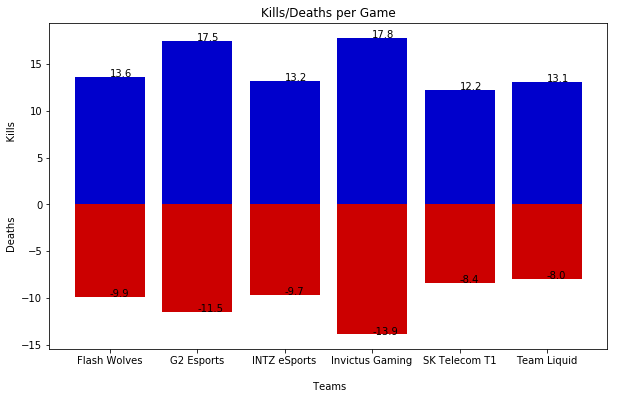

In [155]:
plt.figure(figsize = (10, 6))
kills = teams['Kills / game']
death = teams['Deaths / game']
plt.bar(team_names, kills, color = '#0000cc')
for i, j in zip(team_names, kills):
    plt.annotate((j), (i,j))
plt.bar(team_names, death, color = '#cc0000')
for i, j in zip(team_names, death):
    plt.annotate((j), (i,j))
plt.title('Kills/Deaths per Game')
plt.xlabel('\n Teams')
plt.ylabel('Deaths                        Kills')
plt.savefig('Kills Deaths per Game', dpi = 72)
plt.show

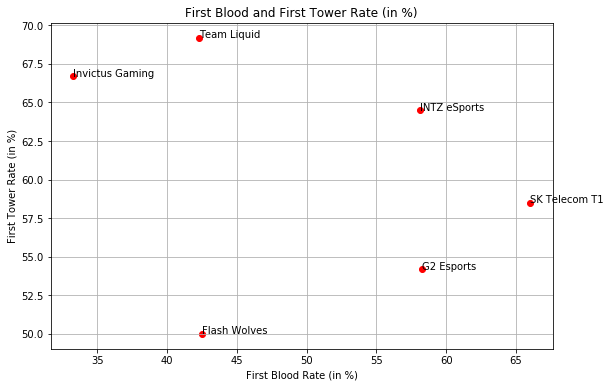

In [156]:
plt.figure(figsize = (9,6))
fb = teams['FB%'].astype(float)
ft = teams['FT%'].astype(float)
plt.scatter(fb, ft, color = 'r')
for i, text in enumerate(team_names):
    plt.annotate(text, (fb[i], ft[i]))
plt.grid(True)
plt.title('First Blood and First Tower Rate (in %)')
plt.xlabel('First Blood Rate (in %)')
plt.ylabel('First Tower Rate (in %)')
plt.savefig('FB e FT rate.png', dpi = 72)
plt.show()

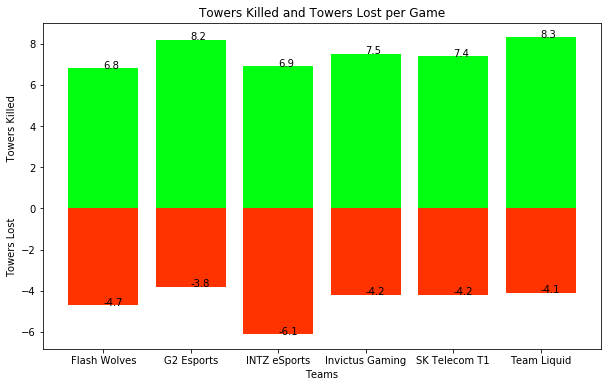

In [157]:
plt.figure(figsize = (10,6))
tk = teams['Towers killed']
tl = teams['Towers lost']
plt.bar(team_names, tk, color = '#00ff11')
for i,j in zip(team_names, tk):
    plt.annotate((j),(i,j))
plt.bar(team_names, tl, color = '#ff3300')
for i,j in zip (team_names, tl):
    plt.annotate((j),(i,j))
plt.title('Towers Killed and Towers Lost per Game')
plt.ylabel('Towers Lost                  Towers Killed')
plt.xlabel('Teams')
plt.savefig('towers.png', dpi = 72)
plt.show()

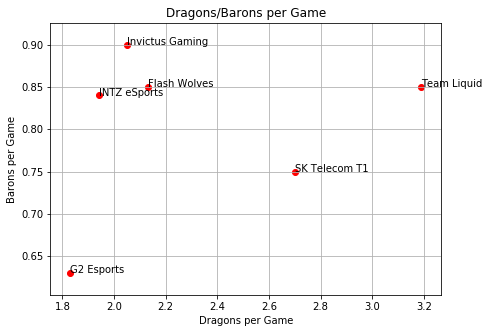

In [158]:
plt.figure(figsize = (7,5))
obj_d = teams['DRAPG'].astype(float)
obj_b = teams['NASHPG'].astype(float)
plt.scatter(obj_d, obj_b, color = 'r')
for i, txt in enumerate(team_names):
    plt.annotate(txt, (obj_d[i], obj_b[i]))
plt.title('Dragons/Barons per Game')
plt.xlabel('Dragons per Game')
plt.ylabel('Barons per Game')
plt.grid(True)
plt.savefig('Drags e Baron per Game.png', dpi = 72)
plt.show()

In [159]:
#Changing types from Object do Int/Float
teams['Game duration'] = teams['Game duration'].str.replace(':', '.')
teams['WPM'] = pd.to_numeric(teams['WPM'])
teams['WCPM'] = pd.to_numeric(teams['WCPM'])
teams['Game duration'] = pd.to_numeric(teams['Game duration'])
teams['DPM'] = pd.to_numeric(teams['DPM'])

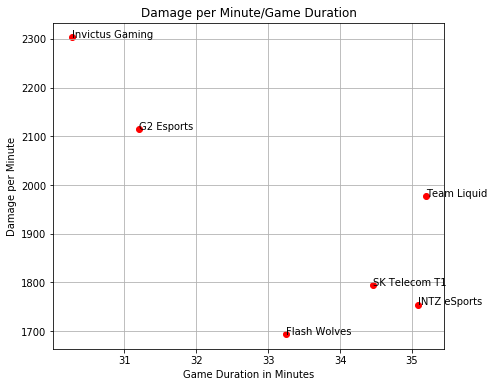

In [160]:
plt.figure(figsize = (7,6))
gamed = teams['Game duration']
damage = teams['DPM']
plt.scatter(gamed, damage, color = 'r')
for i,j in enumerate(team_names):
    plt.annotate(j, (gamed[i], damage[i]))
plt.title('Damage per Minute/Game Duration')
plt.xlabel('Game Duration in Minutes')
plt.ylabel('Damage per Minute')
plt.grid(True)
plt.savefig('DMG per Minute', dpi = 72)
plt.show()

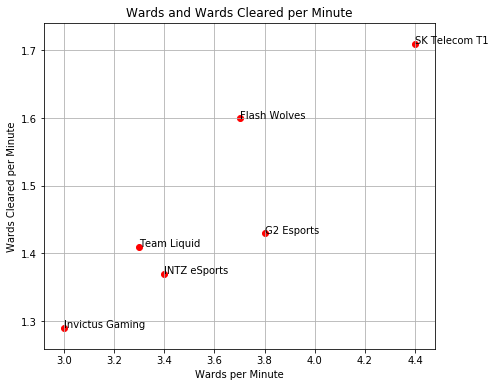

In [161]:
plt.figure(figsize = (7,6))
ward = teams['WPM'].astype(float)
ward_c = teams['WCPM'].astype(float)
plt.scatter(ward, ward_c, color = 'r')
for i,j in enumerate(team_names):
    plt.annotate(j, (ward[i], ward_c[i]))
plt.title('Wards and Wards Cleared per Minute')
plt.xlabel('Wards per Minute')
plt.ylabel('Wards Cleared per Minute')
plt.grid(True)
plt.savefig('Wards and Wards Cleared per Minute.png', dpi = 72)
plt.show()